#Importing libraries and source datas

In [168]:
# import 'pandas' data analysis library
import pandas as pd

# import 'matplotlib' library's 'pyplot' interface for creating charts/plots
import matplotlib.pyplot as plt

# import chart style sheets
from matplotlib import style
# which style sheet to use
style.use('ggplot')

# import 'seaborn' data visualization library
import seaborn as sns

# import 'skew' and 'kurtosis' from 'scipy' library's 'stats' module
from scipy.stats import skew, kurtosis

# import Shapiro-Wilk (S-W) normality test
from scipy.stats import shapiro

# import function for coloring output
from termcolor import colored

# import probability Q-Q plot
from scipy.stats import probplot

# import Levene's test - testing the difference in the Variances of groups
from scipy.stats import levene

# import Student's t-test (2 independent samples) 
from scipy.stats import ttest_ind


In [169]:
# load dataset
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [170]:
print(df.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


#Data preparation

In [171]:
#create new column tip%
df['tip%'] = df['tip'] / df['total_bill']

In [172]:
# convert column's data type to string/float
df[['sex','smoker','day', 'time']] = df[['sex','smoker','day', 'time']].astype('str')
df['tip%'] = df['tip%'].astype('float64')

In [173]:
print(df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip%          float64
dtype: object


#Descriptive statistics, pivot tables

In [174]:
# descriptive statistics
df.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size,tip%
count,244.000000,244.000000,244,244,244,244,244.000000,244.000000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,0.160803
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,0.061072
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,0.035638
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,0.129127
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,0.154770
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,0.191475


In [175]:
# create a pivot table (sex)
pivot_mean_tip_sex = pd.pivot_table(df, values = ['tip%'], index = ['sex'], 
    aggfunc = 'mean', fill_value = 0, margins = True, margins_name = 'Total')
pivot_mean_tip_sex

,tip%
sex,
Female,0.166491
Male,0.157651
Total,0.160803


In [176]:
pivot_mean_tip_sex_time = pd.pivot_table(df, values = ['tip%'], index = ['sex'], columns = ['time'], 
    aggfunc = 'mean', fill_value = 0, margins = True, margins_name = 'Total')
pivot_mean_tip_sex_time

tip%                    
time      Dinner     Lunch     Total
sex                                 
Female  0.169322  0.162285  0.166491
Male    0.155407  0.166083  0.157651
Total   0.159518  0.164128  0.160803

#Correlation

<Axes: xlabel='total_bill', ylabel='tip%'>

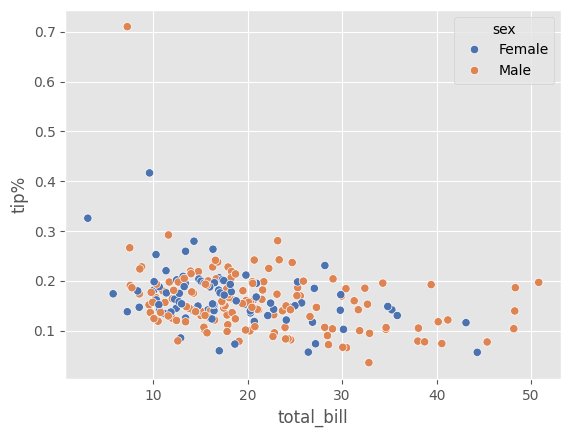

In [177]:
# scatter plot (with Seaborn)
plt.figure()
sns.scatterplot(data = df, x = 'total_bill', y = 'tip%', hue = 'sex', palette ='deep')

In [178]:
# correlation matrix (how strongly are variables related to each other)
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,total_bill,tip,size,tip%
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip%,-0.338624,0.342370,-0.142860,1.000000


<Axes: >

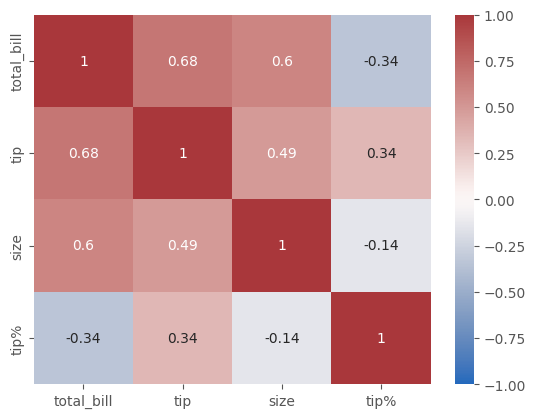

In [179]:
# visualize correlations in a heatmap matrix
plt.figure()
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = +1, cmap ="vlag")


<Figure size 640x480 with 0 Axes>

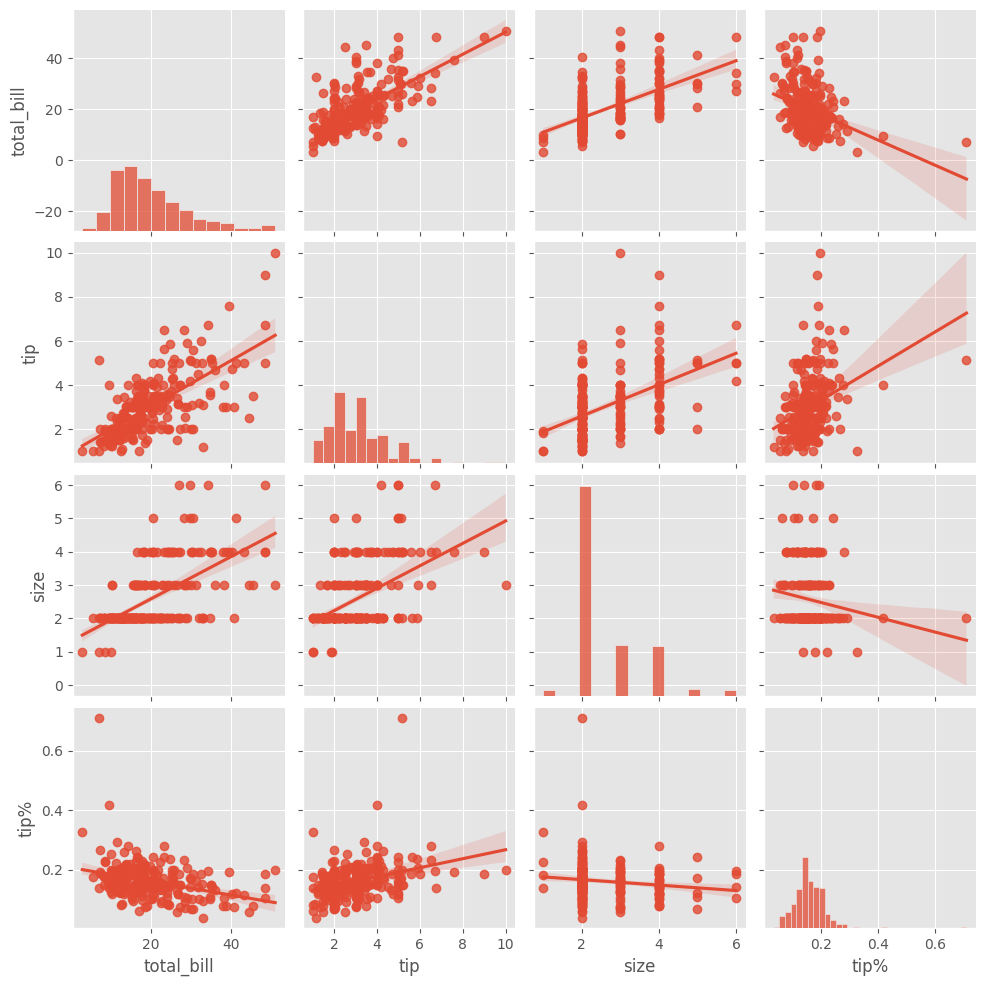

In [180]:
# visualize correlations and distributions in pairplot
plt.figure()
sns.pairplot(df, kind = 'reg')

#Creat two sample groups

In [181]:
group_names = ['Male','Female']

In [182]:
tested_column='tip%'
group_by_column='sex'

In [183]:
# only data rows for male
group_1 = df[ df[group_by_column] == group_names[0]]
group_1.shape

(157, 8)

In [184]:
# only data rows for dinner
group_2 = df[ df[group_by_column] == group_names[1]]
group_2.shape

(87, 8)

#Box plot and Histogram

Text(0.5, 1.0, 'Tips%')

<Figure size 640x480 with 0 Axes>

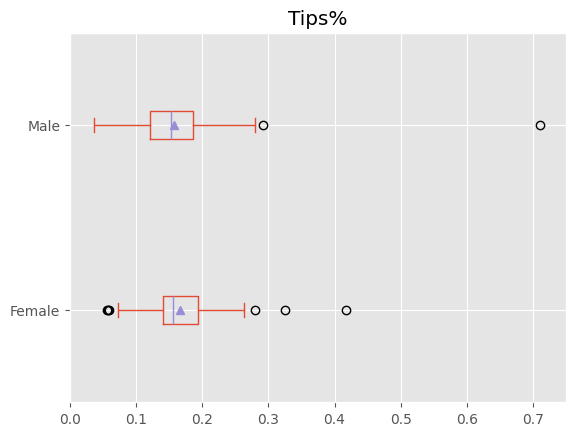

In [185]:
# box plot: chart showing the descriptive statistics values group 1 and group 2
plt.figure()
df.plot.box(column = tested_column, by = group_by_column, showmeans = True,vert = False)
plt.xlim(0, 0.75)
plt.title('Tips%')



Text(0.5, 1.0, 'Tips from Male')

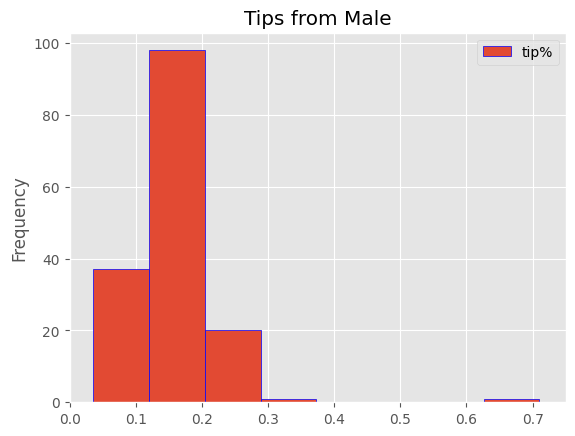

In [186]:
# histogram: frequency of data (with Pandas) group 1
plt.figure()
group_1[tested_column].plot.hist(bins = 8, edgecolor = 'blue', legend = True)
plt.xlim(0, 0.75)
plt.title('Tips from Male')

Text(0.5, 1.0, 'Tips from Female')

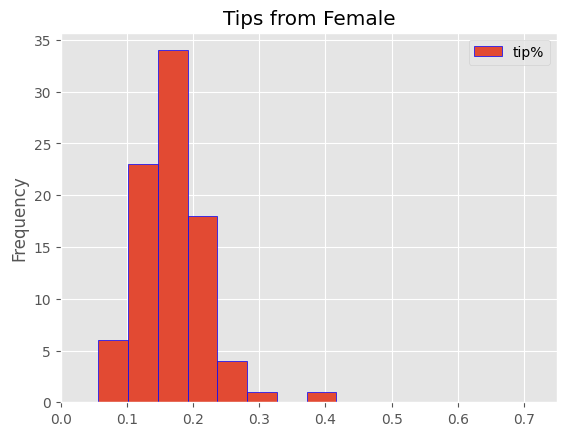

In [187]:
# histogram: frequency of data (with Pandas) group 2
plt.figure()
group_2[tested_column].plot.hist(bins = 8, edgecolor = 'blue', legend = True)
plt.xlim(0, 0.75)
plt.title('Tips from Female')

<Axes: xlabel='tip%', ylabel='Count'>

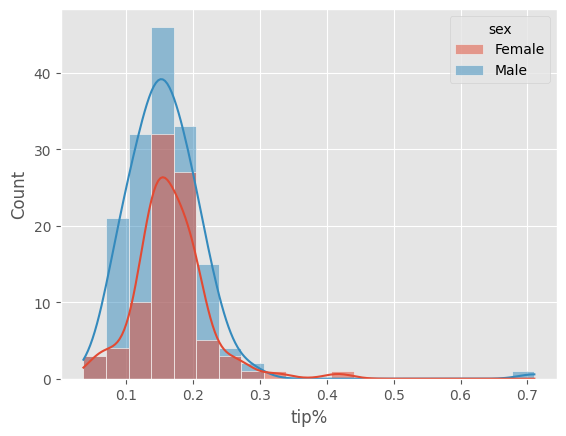

In [188]:
# histogram: frequency of data
plt.figure()
sns.histplot(data = df, bins = 20, x = tested_column, 
    hue = group_by_column, kde = True)


#Skew ans Kurtosis

In [189]:
# define function for conditionally coloring p value
def pcol(p):
    p = round(p, 4)
    if p >= 0.05:
        return colored(f'p = {p}', 'green')
    else:
        return colored(f'p = {p}', 'red')


In [190]:
# calculate the skewness
skew_group_1 = skew(group_1[tested_column])
skew_group_2 = skew(group_2[tested_column])

print(f'Skew group_1: {skew_group_1}')
print(f'Skew group_2: {skew_group_2}')

Skew group_1: 3.9876615931172146
Skew group_2: 1.309528046324935


In [191]:
# calculate the kurtosis (Fisher's)
kurtosis_group_1 = kurtosis(group_1[tested_column])
kurtosis_group_2 = kurtosis(group_2[tested_column])

print(f'Kurtosis group_1: {kurtosis_group_1}')
print(f'Kurtosis group_2: {kurtosis_group_2}')

Kurtosis group_1: 31.98212081629474
Kurtosis group_2: 5.055178206864127


#Hypothesis testing

In [192]:
# Normality test
## null hypothesis: distribution of the sample is NOT significantly DIFFERENT from a normal distribution

In [193]:
# Shapiro-Wilk normality test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = shapiro(group_1[tested_column])
print(f'{group_names [0]}: {pcol (result.pvalue)}')

Male: p = 0.0


In [194]:
# Shapiro-Wilk normality test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = shapiro(group_2[tested_column])
print(f'{group_names [1]}: {pcol (result.pvalue)}')

Female: p = 0.0


<function matplotlib.pyplot.show(close=None, block=None)>

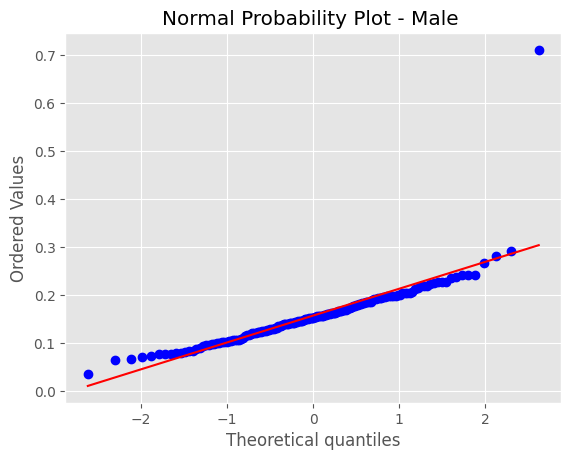

In [195]:
# visualize a probability Q-Q plot
probplot(group_1[tested_column], dist = 'norm', plot = plt)
plt.title( f'Normal Probability Plot - {group_names [0]} ')
plt.show


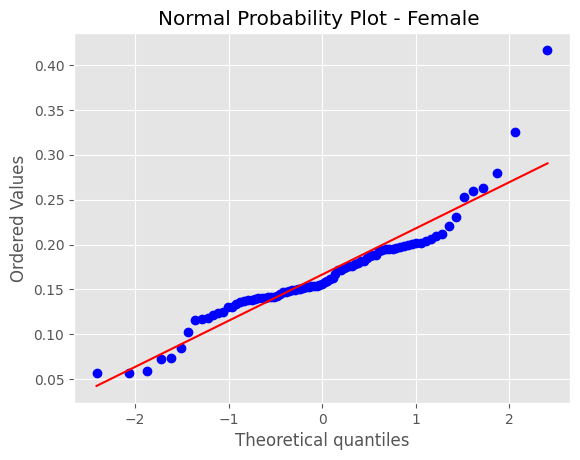

In [196]:
# visualize a probability Q-Q plot
probplot(group_2[tested_column], dist = 'norm', plot = plt)
plt.title( f'Normal Probability Plot - {group_names [1]} ')
plt.show


In [42]:
# Levene's test:
## null hypothesis: there is NO significant DIFFERENCE in Variances of the sample groups

In [43]:
# Levene's test
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = levene(group_1[tested_column], group_2[tested_column])
print(f'{group_names[0]} vs {group_names[1]} : {pcol(result.pvalue)}')

Male vs Female : p = 0.4986


In [44]:
# Student's t-test (2 independent samples):
## null hypothesis: there is NO significant DIFFERENCE in the Means of 2 sample groups

In [45]:
# Student's t-test (2 independent samples)
# p < 0.05 -> we reject the null hypothesis
# p > 0.05 -> we fail to reject the null hypothesis
result = ttest_ind(group_1[tested_column], group_2[tested_column])
print(f'{group_names[0]} vs {group_names[1]} : {pcol(result.pvalue)}')

Male vs Female : p = 0.2797


#Final section

In [46]:
print('Statistical analysis completed!')

Statistical analysis completed!
